# Ejercicio 4: Simulacion de Monte Carlo
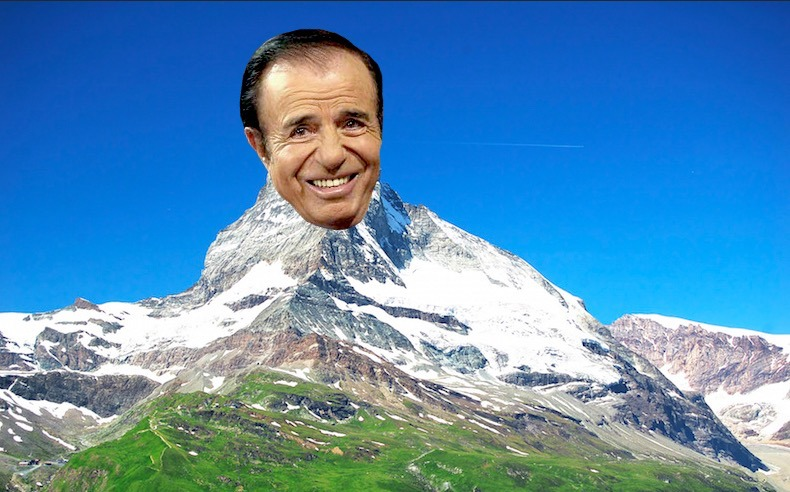

In [ ]:
import math as m 
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy as sp
import numpy as np

plt.style.use("seaborn-deep")

In [ ]:
## Parametros
n = 9   # cantidad de etapas del sistema de transmision
snr = 5   # snr en dB
h = 0.9 # coeficiente de atenuacion
var_ruido = 1  #varianza del ruido
Ag = 0

## Etapa de amplificacion del simbolo
En base a la SNR y la varianza del ruido (establecida en el bloque anterior), se ajusta la amplitud del simbolo a transmitir para que cumpla las especificaciones de relacion señal a ruido. Es decir, cuando la funcion principal de la simulacion de Monte Carlo recibe un $0$, este se transforma en el simbolo $\textbf{-A}$ y al recibir $1$, en el simbolo $\textbf{A}$

In [ ]:
def amplificacion(X,snr_db):
    
    
    #A = h*np.sqrt(np.abs(snr * var_ruido) #se genera la amplitud en base a la snr. snr=A/var_ruido
    A = np.sqrt((10**(snr_db/10))*var_ruido)/h
    Ag=A
    
    #se amplifica la señal segun el simoblo 
    if X == 1:
        X = A
    else: 
        X = -A
    return X

## Simulacion de transmision
Se definen funciones que simulan una etapa de transmision segun el diagrama de bloques.
Repetidor analogico:
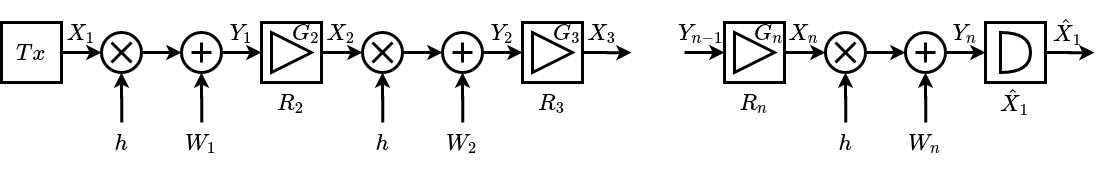
Repetidor Digital:
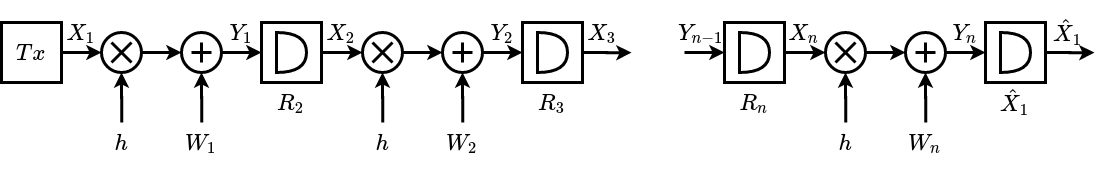

In [ ]:
def tx_analogico(X,snr_db):  
    W = np.random.normal(0,np.sqrt(var_ruido))
    X = X * h + W
    snr = 10 * np.log10(snr_db)
    A = np.sqrt(snr/(snr+1))/h #se genera la amplitud en base a la snr

    return X*A

def tx_digital(X): 
    X_inicial = X
    W = np.random.normal(0, np.sqrt(var_ruido))
    X = X * h + W

    # simulacion del bloque de decision
    if X >= 0:
        X = np.abs(X_inicial)
    elif X < 0 :
        X = -np.abs(X_inicial)
    return X



## Repetidores
Defino funciones que incorporen las etapas anteriores pero de manera sucesiva y graficando la trayectoria del simbolo en cada etapa


In [ ]:
def repetidor_digital(X, n, snr, plot):
    
    nX = []
    sY = []
    X = amplificacion(X, snr)
    sY.append(X)
    nX.append(0)
    for i in range(n):
        nX.append(i+1)
        X = tx_digital(X)
        sY.append(X)
    if plot == True:
      plt.plot(nX, sY,alpha = 0.6)
    ## cuento
    if sY[0]>=0 and sY[n]>=0:
      return 0  # devuelve 0 si OK
    if sY[0]>=0 and sY[n]<0:
      return 1 # devuelve 1 si hubo error 
    if sY[0]<0 and sY[n]<0:
      return 0  # devuelve 0 si OK
    if sY[0]<0 and sY[n]>=0:
      return 1 # devuelve 1 si hubo error 
def repetidor_analogico(X, n, snr, plot):
    reci = X
    nX = []
    sY = []
    X = amplificacion(X,snr)
    Ag = X
    sY.append(X)
    nX.append(0)
    for i in range(n):
        nX.append(i+1)
        X = tx_analogico(X,snr)
        sY.append(X)

    if reci > 0:
      Arecibido.append(sY[n])
    else:
      mArecibido.append(sY[n])

    if plot == True:
      plt.plot(nX,sY,alpha = 0.6, linewidth = 0.6)
    ## cuento
    if sY[0]>=0 and sY[n]>=0:
      return 0  # devuelve 0 si OK
    if sY[0]>=0 and sY[n]<0:
      return 1 # devuelve 1 si hubo error 
    if sY[0]<0 and sY[n]<0:
      return 0  # devuelve 0 si OK
    if sY[0]<0 and sY[n]>=0:
      return 1 # devuelve 1 si hubo error 
   

# Simulacion de Monte Carlo

Definir la cantidad de iteraciones del experimiento a priori

In [ ]:
iteraciones = 1000

## Simulacion de Monte Carlo para sistema analogico

In [ ]:
def MonteCarloAnalogico(snr, do_plot: bool): #va a devolver las probabilidades de error de c/u
    errores_1 = 0
    errores_0 = 0 
   
    for i in range(iteraciones):
        #repetidor_digital(1, 9)
        errores_1 += repetidor_analogico(1, n, snr, do_plot)
        errores_0 += repetidor_analogico(0, n, snr, do_plot)
    if do_plot == True:
      plt.plot(range(n+1),np.zeros(n+1),':r',alpha = 0.5) # linea del 0
      plt.grid(True)
      plt.title("Simulacion de Monte Carlo para sistema de transmision analogica")
      plt.xlabel("Estapas de la transmision")
      plt.ylabel("Amplitud")  
      plt.show()
      #print("Probabilidad de error al enviar un 1 por repetidor analogico:",errores_1/iteraciones)
      #print("Probabilidad de error al enviar un 0 por repetidor analogico:",errores_0/iteraciones)
    return 0.5*(errores_1+errores_0)/iteraciones

## Simulacion de Monte Carlo para sistema digital

In [ ]:
def MonteCarloDigital(snr, do_plot: bool):
    errores_1 = 0
    errores_0 = 0 
    for i in range(iteraciones):
       errores_1 += repetidor_digital(1, n, snr, do_plot )
       errores_0 += repetidor_digital(0, n, snr, do_plot )
    if do_plot == True :
      plt.plot(range(n+1),np.zeros(n+1),':r',alpha = 0.5) # linea del 0
      plt.grid(True)
      plt.title("Simulacion de Monte Carlo para sistema de transmision digital")
      plt.xlabel("Estapas de la transmision")
      plt.ylabel("Amplitud")  
      plt.show()
      #print("Probabilidad de error al enviar un 1 por repetidor digital:",errores_1/iteraciones)
      #print("Probabilidad de error al enviar un 0 por repetidor digital:",errores_0/iteraciones)
    return 0.5*(errores_1+errores_0)/iteraciones

### Definición de la probabilidad de error para sistema analógico

In [ ]:
snr_db = np.arange(-5,30,1)
snr_times = 10**(snr_db/10)

def prob_error_analogico(snr,n):
  return sps.norm.sf(np.sqrt(1 / ( (1+(1/snr_times))**n - 1)))

### Definición de la probabilidad de error para sistema digital*

In [ ]:
def prob_error_digital(snr,n):
  return 0.5*(1-(1-2*sps.norm.sf(np.sqrt(snr)))**n)

## 4.1 Ejecucion de la simulacion

Grafico de probabilidad de error en funcion de SNR para repetidor analogico



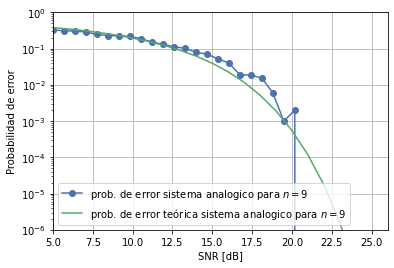

In [ ]:
snr = np.linspace(5,25,30)
prob_e =[]
for s in snr:
  prob_e.append(MonteCarloAnalogico(s, do_plot=False))
plt.semilogy(snr,prob_e,'-o',label = 'prob. de error sistema analogico para $n={}$'.format(n))
plt.semilogy(snr_db,prob_error_analogico(snr_times,n),'-',label = 'prob. de error teórica sistema analogico para $n={}$'.format(n))

#plt.xticks(snr)
plt.legend(loc='best')
plt.xlabel("SNR [dB]")
plt.ylabel("Probabilidad de error")
plt.xlim([5,26])
plt.ylim([10e-7,1])
plt.grid(True)
plt.show()

Grafico de Amplitud del simbolo enviado en funcion de las etapas de amplificacion para repetido analogico. Caso $SNR = 20dB$

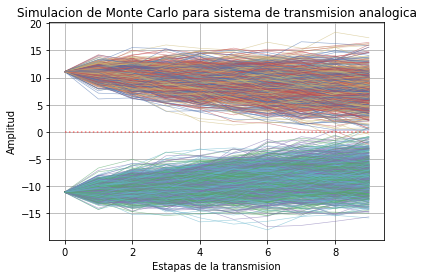

0.003

In [ ]:
Arecibido = []
mArecibido = []
MonteCarloAnalogico(20,do_plot=True)


Grafico de probabilidad de error en funcion de SNR para repetidor digital

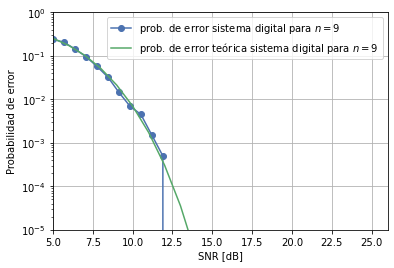

In [ ]:
snr = np.linspace(5,25,30)
prob_e =[]
for s in snr:
  prob_e.append(MonteCarloDigital(s, do_plot = False))
plt.semilogy(snr,prob_e,'-o',label = 'prob. de error sistema digital para $n={}$'.format(n))
plt.semilogy(snr_db,prob_error_digital(snr_times,n),'-',label = 'prob. de error teórica sistema digital para $n={}$'.format(n))

#plt.xticks(snr)
plt.legend(loc='best')
plt.xlabel("SNR [dB]")
plt.ylabel("Probabilidad de error")
plt.xlim([5,26])
plt.ylim([10e-6,1])
plt.grid(True)
plt.show()

Grafico de Amplitud del simbolo enviado en funcion de las etapas de amplificacion para repetido digital. Caso $SNR = 10dB$

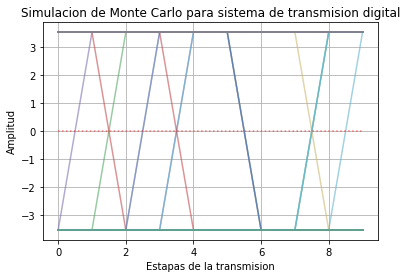

0.008

In [ ]:
MonteCarloDigital(10,do_plot=True)

## 4.2 Por qué las curvas de probabilidad de error deberian ser cercanas a la curva teorica?

Por la Ley de los Grandes Numeros, el metodo de Monte Carlo nos permite ensayar una gran cantidad de experimentos con las condiciones modeladas en los repetidores. La Ley de los Grandes Numeros enuncia que al realizar multiples experimentos que brinden un resultado aleatorio, se tiene que la media muestral converge en probabilidad a la media del experimento. 

Segun como fue planteado este experimento, la media muestral esta reflejando un valor de probabilidad, la probabilidad de obtener un error en los sistemas de repetidores.

Desde el experimento de Monte Carlo, realizandose multiples veces el envio de un dato por el sistema de repetidores, podemos decir que la probabilidad de error obtenida empiricamente se aproxima a la teorica si existen las suficientes iteraciones del experimento.

## 4.3 Grafico de las pdf del simbolo recibido en la ultima etapa del sistema analogico, condicionada al simbolo transmitido.

En base a la informacion de probabilidad de error para una determinada SNR, se puede obtener la probabilidad de exito, dado que se envio cierto simbolo.
De esta manera se puede ver que siendo enviado el simbolo $A$, a la salida del sistema se recibira ese simbolo $A$ con cierta probabilidad $p_A$. La variable tiene un comportamiento de gaussiano. 








In [ ]:
def prob_error_digital(snr,n):
  return 0.5*(1-(1-2*sps.norm.sf(np.sqrt(snr)))**n)

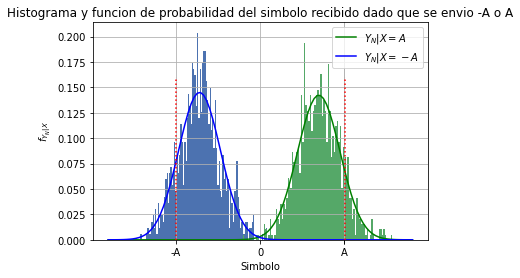

In [ ]:

x = np.linspace(-20,20,100)
i, bins, patches = plt.hist(mArecibido,100, density=True)
i, bins, patches = plt.hist(Arecibido,100, density=True)
ua = np.median(Arecibido)
va = np.var(Arecibido)
uma = np.median(mArecibido)
vma = np.var(mArecibido)

plt.plot(x,sps.norm.pdf(x,ua,np.sqrt(va)),'-g',label = "$Y_N|X=A$")
plt.plot(x,sps.norm.pdf(x,uma,np.sqrt(vma)),'-b',label = "$Y_N|X=-A$")

plt.plot([11.11, 11.11] , [0, 0.16],':r')
plt.plot([-11.11, -11.11] , [0, 0.16],':r')
plt.xticks([-11.11,0, 11,11], ['-A','0', 'A'])

plt.xlabel("Simbolo")
plt.ylabel("$f_{Y_N|X}$")
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Histograma y funcion de probabilidad del simbolo recibido dado que se envio -A o A")
plt.show()


## Conclusion
Podemos observar que la simulacion mediante el metodo de Monte Carlo combina los resultados obtenidos en la teoria de la Ley de los Grandes numeros y esta resultan un pilar fundamental de dicha tecnica. Ademas se pudo obtener una prueba visual de este fenomeno viendo ilustrativamente que los resultados tienden a los analiticos al aumentar la cantidad de experimentos aleatorios